In [ ]:
pwd

In [ ]:
cd gan_data/training_progress/

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

import time


import matplotlib.pyplot as plt

from tqdm import tqdm

from IPython.display import clear_output



%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [4]:
path = '//gan_data//training_progress//'

In [ ]:
pwd

'/home/16011015/notebooks/SRON-DCGAN/notebooks/gan_data/training_progress'

In [ ]:
def plot_progress():
    n = 100 # 5000, plot every n-th point

    DGz = pd.DataFrame(arrays[0])
    Dx = pd.DataFrame(arrays[1])

    DGz = DGz.rolling(n).mean()
    Dx = Dx.rolling(n).mean()


    plt.figure(figsize=(10,5))

    plt.plot(DGz, '-', label='D(G(z))', c='r', alpha=0.8)
    plt.plot(Dx, '-', label='D(x)', c='b', alpha=0.8)
    
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7)

    plt.xlabel('iters')


    plt.legend(loc='lower left', bbox_to_anchor= (1, 0.88), borderaxespad=0, frameon=False)

    #z = 10 # plot epoch bar every z epochs
    #batches_per_epoch = 79
    #for i in range(len(DGz)):
    #        if (i!=0) and (i % (batches_per_epoch*z) == 0):
    #            plt.axvline(x=i,  color='black', linestyle='--', alpha=1)
    
    
    """vline's for gan_data//weights//netG_state_dict0"""
    # D:2 -> D:4
    #plt.axvline(x=35000,  color='black', linestyle='--', alpha=1)
    
    # Training restarted after it crashed overnight
    #plt.axvline(x=128000,  color='black', linestyle='--', alpha=1)
    
    # D4 -> D2
    #plt.axvline(x=1400000,  color='black', linestyle='--', alpha=1)
    
    # Terminal got shutdown overnight
    #plt.axvline(x=2.23e6,  color='black', linestyle='--', alpha=1)
    
    # Repo cleaned, weights moved & train/test changed to ASPA v2 dataset, using 500k train G1 D2
    #plt.axvline(x=2.593e6,  color='black', linestyle='--', alpha=1)
    
    # Crashed overnight
    #plt.axvline(x=2.918e6,  color='black', linestyle='--', alpha=1)
    
    
    """vlines for v3"""
    # D3 -> D2
    #plt.axvline(x=205e3,  color='black', linestyle='--', alpha=1)
    
    # 100k train images -> 1e6 train images.
    #plt.axvline(x=655e3,  color='black', linestyle='--', alpha=1)
    
    """vlines for v4"""
    # crashed overnight
    plt.axvline(x=724e3,  color='black', linestyle='--', alpha=1)
    
    # switched to train 4.1 (4.0 did np.log(param), where 4.1 does np.log10(param))
    plt.axvline(x=2508e3,  color='black', linestyle='--', alpha=1)
    
    # Removed mape(STD) and mape(MEAN) from loss, so it's only WGAN-GP now
    plt.axvline(x=3250e3,  color='black', linestyle='--', alpha=1)
    
    # Changed progress saving from float 64 to 32
    # messed up weights so reverted back to (a bit) earlier version
    plt.axvline(x=4.344e6,  color='black', linestyle='--', alpha=1)
    
    #plt.xlim(left=4.2e6) # 3.2
    plt.grid()
    plt.show()

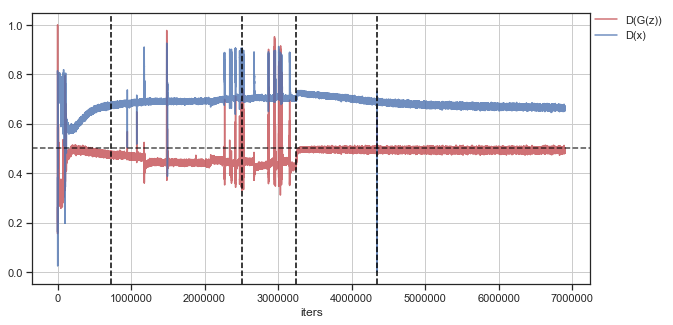

In [ ]:
while True:
    try:
        variable_names = ['d_fake', 'd_real']
        arrays = []

        """Load data"""
        for name in variable_names:
            arrays.append(np.load(name+'_v4_test.npy'))

        """Plot progress"""
        clear_output()
        plot_progress()

        time.sleep(5)
    except:
        pass